In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

%matplotlib inline
sns.set_style("darkgrid")

In [3]:
# country codes conversion
country_csv = ("country_codes.csv")
country_df = pd.read_csv(country_csv)
country_df2 = country_df[["Alpha-2 code","Alpha-3 code"]].copy()
country_df3 = country_df2.rename(columns={'Alpha-3 code': 'NOC'}, inplace = False)
country_df3.head()

,Alpha-2 code,NOC
0,AF,AFG
1,AX,ALA
2,AL,ALB
3,DZ,DZA
4,AS,ASM


In [4]:
path = ("athlete_events.csv")
df_events = pd.read_csv(path)


#df_events["join_id"] = df_events["NOC"] + df_events["Year"].astype(str)
# summer_df = df_events[df_events['Season'] == 'Summer']
# summer_df["BMI"] = summer_df["Weight"]/((summer_df["Height"]/100)**2)
# Add numerical value for medals? 3 = gold, 2= silver, 1 bronze and no medal = 0
df_events_a = pd.merge(df_events, country_df3, on="NOC")
df_events_a['join_id'] = df_events_a["NOC"] + df_events_a["Year"].astype(str)
df_events_a.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Alpha-2 code,join_id
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,CN,CHN1992
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,CN,CHN2012
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,CN,CHN2000
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,CN,CHN2004
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,CN,CHN2016
5,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,NaN,CN,CHN2016
6,3605,An Weijiang,M,22.0,178.0,72.0,China,CHN,2006 Winter,2006,Winter,Torino,Speed Skating,Speed Skating Men's 500 metres,NaN,CN,CHN2006
7,3605,An Weijiang,M,22.0,178.0,72.0,China,CHN,2006 Winter,2006,Winter,Torino,Speed Skating,"Speed Skating Men's 1,000 metres",NaN,CN,CHN2006
8,3610,An Yulong,M,19.0,173.0,70.0,China,CHN,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,Short Track Speed Skating Men's 500 metres,Silver,CN,CHN1998
9,3610,An Yulong,M,19.0,173.0,70.0,China,CHN,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,"Short Track Speed Skating Men's 1,000 metres",NaN,CN,CHN1998


In [5]:
path3 = ("country_lat_long.csv")
lat_long_df = pd.read_csv(path3)
lat_long_df2 = lat_long_df.rename(columns={'country': 'Alpha-2 code'})
lat_long_df2

,Alpha-2 code,latitude,longitude,name,NOC
0,AD,42.546245,1.601554,Andorra,AND
1,AE,23.424076,53.847818,United Arab Emirates,ARE
2,AF,33.939110,67.709953,Afghanistan,AFG
3,AG,17.060816,-61.796428,Antigua and Barbuda,ATG
4,AI,18.220554,-63.068615,Anguilla,AIA
...,...,...,...,...,...
240,YE,15.552727,48.516388,Yemen,YEM
241,YT,-12.827500,45.166244,Mayotte,MYT
242,ZA,-30.559482,22.937506,South Africa,ZAF
243,ZM,-13.133897,27.849332,Zambia,ZMB


In [6]:
# lat_long_df2['join_id'] =  lat_long_df2["Alpha-2 code"] + lat_long_df2["Year"].astype(str)
df_events_b = pd.merge(df_events_a, lat_long_df2, on="Alpha-2 code")
df_events_b.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC_x,Games,Year,...,City,Sport,Event,Medal,Alpha-2 code,join_id,latitude,longitude,name,NOC_y
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,Barcelona,Basketball,Basketball Men's Basketball,NaN,CN,CHN1992,35.86166,104.195397,China,CHN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,...,London,Judo,Judo Men's Extra-Lightweight,NaN,CN,CHN2012,35.86166,104.195397,China,CHN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,...,Sydney,Boxing,Boxing Men's Middleweight,NaN,CN,CHN2000,35.86166,104.195397,China,CHN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,...,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,CN,CHN2004,35.86166,104.195397,China,CHN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,...,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,CN,CHN2016,35.86166,104.195397,China,CHN


In [7]:
# population
path4 = ("population_by_country.csv")
pop_df = pd.read_csv(path4)
pop_df['join_id'] =  pop_df["NOC"] + pop_df["Year"].astype(str)
pop_df

,NOC,Year,Population,join_id
0,AFG,1936,12000000.0,AFG1936
1,AFG,1948,7000000.0,AFG1948
2,AFG,1956,7000000.0,AFG1956
3,AFG,1960,8996967.0,AFG1960
4,AFG,1964,9744772.0,AFG1964
...,...,...,...,...
3300,ZIM,2004,NaN,ZIM2004
3301,ZIM,2008,NaN,ZIM2008
3302,ZIM,2012,NaN,ZIM2012
3303,ZIM,2014,NaN,ZIM2014


In [8]:
df_events_c = pd.merge(df_events_b, pop_df, on="join_id")
df_events_c

,ID,Name,Sex,Age,Height,Weight,Team,NOC_x,Games,Year_x,...,Medal,Alpha-2 code,join_id,latitude,longitude,name,NOC_y,NOC,Year_y,Population
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,NaN,CN,CHN1992,35.861660,104.195397,China,CHN,CHN,1992,1.164970e+09
1,6848,Bai Chongguang,M,21.0,184.0,83.0,China,CHN,1992 Summer,1992,...,NaN,CN,CHN1992,35.861660,104.195397,China,CHN,CHN,1992,1.164970e+09
2,6854,Bai Mei,F,17.0,166.0,46.0,China,CHN,1992 Summer,1992,...,NaN,CN,CHN1992,35.861660,104.195397,China,CHN,CHN,1992,1.164970e+09
3,11225,Bi Zhong,M,23.0,188.0,110.0,China,CHN,1992 Summer,1992,...,NaN,CN,CHN1992,35.861660,104.195397,China,CHN,CHN,1992,1.164970e+09
4,17295,Cai Yanshu,M,28.0,169.0,79.0,China,CHN,1992 Summer,1992,...,NaN,CN,CHN1992,35.861660,104.195397,China,CHN,CHN,1992,1.164970e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196756,120439,Okilani Tinilau,M,19.0,NaN,NaN,Tuvalu,TUV,2008 Summer,2008,...,NaN,TV,TUV2008,-7.109535,177.649330,Tuvalu,TUV,TUV,2008,1.031500e+04
196757,66655,Tuau Lapua Lapua,M,21.0,140.0,62.0,Tuvalu,TUV,2012 Summer,2012,...,NaN,TV,TUV2012,-7.109535,177.649330,Tuvalu,TUV,TUV,2012,1.074400e+04
196758,74540,Asenate Manoa,F,20.0,NaN,46.0,Tuvalu,TUV,2012 Summer,2012,...,NaN,TV,TUV2012,-7.109535,177.649330,Tuvalu,TUV,TUV,2012,1.074400e+04
196759,86663,Tavevele Noa,M,20.0,176.0,74.0,Tuvalu,TUV,2012 Summer,2012,...,NaN,TV,TUV2012,-7.109535,177.649330,Tuvalu,TUV,TUV,2012,1.074400e+04


In [9]:
df_country_summ = df_events_b.groupby(["NOC_x","Season"]).size().reset_index(name="Count")
# df_country_summ = df_country_summ.loc[df_country_summ['Year'] >= 1924]
df_country_summ

,NOC_x,Season,Count
0,AFG,Summer,126
1,ALB,Summer,63
2,ALB,Winter,7
3,AND,Summer,53
4,AND,Winter,116
...,...,...,...
191,UZB,Winter,31
192,VEN,Summer,918
193,VEN,Winter,7
194,VNM,Summer,62


In [10]:
## Copy to main
df_country_sum2 = df_country_summ.pivot(index=['NOC_x'], columns='Season', values=['Count'])
df_country_sum2.replace(np.nan,0,inplace=True)
df_country_sum2.reset_index(inplace=True)
df_country_sum2.columns = [' '.join(col).strip() for col in df_country_sum2.columns.values]

df_country_sum2.head()


,NOC_x,Count Summer,Count Winter
0,AFG,126.0,0.0
1,ALB,63.0,7.0
2,AND,53.0,116.0
3,ANT,133.0,0.0
4,ARG,2913.0,384.0


In [11]:
## Add correction to main

conditions = [
    (df_country_sum2['Count Summer']> 0) & (df_country_sum2['Count Winter'] > 0),
    (df_country_sum2['Count Summer']> 0) & (df_country_sum2['Count Winter'] == 0),
    (df_country_sum2['Count Summer'] == 0) & (df_country_sum2['Count Winter'] > 0)]
choices = [2, 1, 3]

df_country_sum2['summer_winter'] = np.select(conditions, choices, default=0)

df_country_sum2.head()

,NOC_x,Count Summer,Count Winter,summer_winter
0,AFG,126.0,0.0,1
1,ALB,63.0,7.0,2
2,AND,53.0,116.0,2
3,ANT,133.0,0.0,1
4,ARG,2913.0,384.0,2


In [12]:
## Add correction to main

df_events_d = pd.merge(df_events_b, df_country_sum2, on=["NOC_x"])
df_events_d = df_events_d.loc[df_events_d['Year'] >= 1924]

df_events_d

,ID,Name,Sex,Age,Height,Weight,Team,NOC_x,Games,Year,...,Medal,Alpha-2 code,join_id,latitude,longitude,name,NOC_y,Count Summer,Count Winter,summer_winter
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,NaN,CN,CHN1992,35.861660,104.195397,China,CHN,4323.0,818.0,2
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,...,NaN,CN,CHN2012,35.861660,104.195397,China,CHN,4323.0,818.0,2
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,...,NaN,CN,CHN2000,35.861660,104.195397,China,CHN,4323.0,818.0,2
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,...,NaN,CN,CHN2004,35.861660,104.195397,China,CHN,4323.0,818.0,2
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,...,NaN,CN,CHN2016,35.861660,104.195397,China,CHN,4323.0,818.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196756,74540,Asenate Manoa,F,16.0,NaN,46.0,Tuvalu,TUV,2008 Summer,2008,...,NaN,TV,TUV2008,-7.109535,177.649330,Tuvalu,TUV,7.0,0.0,1
196757,74540,Asenate Manoa,F,20.0,NaN,46.0,Tuvalu,TUV,2012 Summer,2012,...,NaN,TV,TUV2012,-7.109535,177.649330,Tuvalu,TUV,7.0,0.0,1
196758,86663,Tavevele Noa,M,20.0,176.0,74.0,Tuvalu,TUV,2012 Summer,2012,...,NaN,TV,TUV2012,-7.109535,177.649330,Tuvalu,TUV,7.0,0.0,1
196759,120422,Etimoni Timuani,M,24.0,184.0,72.0,Tuvalu,TUV,2016 Summer,2016,...,NaN,TV,TUV2016,-7.109535,177.649330,Tuvalu,TUV,7.0,0.0,1


In [13]:
conditions_gld = [
    (df_events_d['Medal']== "Gold"),
    (df_events_d['Medal']!= "Gold")]
choices_gld = [1, 0]
df_events_d['gold'] = np.select(conditions_gld, choices_gld, default=0)

conditions_slv = [
    (df_events_d['Medal']== "Silver"),
    (df_events_d['Medal']!= "Silver")]
choices_slv = [1, 0]
df_events_d['silver'] = np.select(conditions_slv, choices_slv, default=0)

conditions_brz = [
    (df_events_d['Medal']== "Bronze"),
    (df_events_d['Medal']!= "Bronze")]
choices_brz = [1, 0]

df_events_d['bronze'] = np.select(conditions_brz, choices_brz, default=0)
df_events_e = df_events_d.loc[df_events_d['summer_winter'] == 2]
df_events_e

,ID,Name,Sex,Age,Height,Weight,Team,NOC_x,Games,Year,...,latitude,longitude,name,NOC_y,Count Summer,Count Winter,summer_winter,gold,silver,bronze
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,35.861660,104.195397,China,CHN,4323.0,818.0,2,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,...,35.861660,104.195397,China,CHN,4323.0,818.0,2,0,0,0
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,...,35.861660,104.195397,China,CHN,4323.0,818.0,2,0,0,0
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,...,35.861660,104.195397,China,CHN,4323.0,818.0,2,0,0,0
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,...,35.861660,104.195397,China,CHN,4323.0,818.0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196610,110652,Isaac Mandla Simelane,M,24.0,165.0,50.0,Swaziland,SWZ,1992 Summer,1992,...,-26.522503,31.465866,Swaziland,SWZ,64.0,3.0,2,0,0,0
196611,110652,Isaac Mandla Simelane,M,28.0,165.0,50.0,Swaziland,SWZ,1996 Summer,1996,...,-26.522503,31.465866,Swaziland,SWZ,64.0,3.0,2,0,0,0
196612,110653,Musa Simelane,M,26.0,180.0,57.0,Swaziland,SWZ,2000 Summer,2000,...,-26.522503,31.465866,Swaziland,SWZ,64.0,3.0,2,0,0,0
196613,115173,Robinson David Stewart,M,20.0,185.0,70.0,Swaziland,SWZ,1992 Summer,1992,...,-26.522503,31.465866,Swaziland,SWZ,64.0,3.0,2,0,0,0


In [14]:
df_events_e.to_csv('Untitled Folder/baseline_df.csv', index = False)

In [15]:
# grpoupby for events
df_events_f = df_events_e.groupby(['Year','NOC_x','Season', 'Event','latitude'], as_index=False).agg({'Name':'count','gold': 'max','silver': 'max','bronze': 'max'})

df_events_f



,Year,NOC_x,Season,Event,latitude,Name,gold,silver,bronze
0,1924,ARG,Summer,Athletics Men's 100 metres,-38.416097,3,0,0,0
1,1924,ARG,Summer,Athletics Men's 110 metres Hurdles,-38.416097,1,0,0,0
2,1924,ARG,Summer,Athletics Men's 200 metres,-38.416097,1,0,0,0
3,1924,ARG,Summer,Athletics Men's 4 x 100 metres Relay,-38.416097,4,0,0,0
4,1924,ARG,Summer,Athletics Men's 400 metres,-38.416097,4,0,0,0
...,...,...,...,...,...,...,...,...,...
73918,2016,VEN,Summer,"Wrestling Men's Super-Heavyweight, Greco-Roman",6.423750,1,0,0,0
73919,2016,VEN,Summer,"Wrestling Men's Welterweight, Greco-Roman",6.423750,1,0,0,0
73920,2016,VEN,Summer,"Wrestling Women's Featherweight, Freestyle",6.423750,1,0,0,0
73921,2016,VEN,Summer,"Wrestling Women's Heavyweight, Freestyle",6.423750,1,0,0,0


In [16]:
#WINTER
winter_df = df_events_f.loc[df_events_f['Season'] == 'Winter']
winter_df

,Year,NOC_x,Season,Event,latitude,Name,gold,silver,bronze
70,1924,AUS,Winter,Alpinism Mixed Alpinism,-25.274398,1,1,0,0
98,1924,AUT,Winter,Figure Skating Men's Singles,47.516231,1,0,1,0
99,1924,AUT,Winter,Figure Skating Mixed Pairs,47.516231,2,1,0,0
100,1924,AUT,Winter,Figure Skating Women's Singles,47.516231,1,1,0,0
183,1924,BEL,Winter,Bobsleigh Men's Four/Five,50.503887,5,0,0,1
...,...,...,...,...,...,...,...,...,...
68981,2014,UZB,Winter,Alpine Skiing Men's Slalom,41.377491,1,0,0,0
68982,2014,UZB,Winter,Alpine Skiing Women's Giant Slalom,41.377491,1,0,0,0
68983,2014,UZB,Winter,Alpine Skiing Women's Slalom,41.377491,1,0,0,0
68984,2014,UZB,Winter,Figure Skating Men's Singles,41.377491,1,0,0,0


In [17]:
#SUMMER
df_events_f.drop(df_events_f.loc[df_events_f['Season'] == 'Winter'].index, inplace = True)
summer_df = pd.DataFrame(df_events_f)

summer_df



# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#combo_df.drop(combo_df.loc[combo_df['Mouse ID']== 'g989'].index, inplace = True)
#clean_df = pd.DataFrame(combo_df)
#clean_df

,Year,NOC_x,Season,Event,latitude,Name,gold,silver,bronze
0,1924,ARG,Summer,Athletics Men's 100 metres,-38.416097,3,0,0,0
1,1924,ARG,Summer,Athletics Men's 110 metres Hurdles,-38.416097,1,0,0,0
2,1924,ARG,Summer,Athletics Men's 200 metres,-38.416097,1,0,0,0
3,1924,ARG,Summer,Athletics Men's 4 x 100 metres Relay,-38.416097,4,0,0,0
4,1924,ARG,Summer,Athletics Men's 400 metres,-38.416097,4,0,0,0
...,...,...,...,...,...,...,...,...,...
73918,2016,VEN,Summer,"Wrestling Men's Super-Heavyweight, Greco-Roman",6.423750,1,0,0,0
73919,2016,VEN,Summer,"Wrestling Men's Welterweight, Greco-Roman",6.423750,1,0,0,0
73920,2016,VEN,Summer,"Wrestling Women's Featherweight, Freestyle",6.423750,1,0,0,0
73921,2016,VEN,Summer,"Wrestling Women's Heavyweight, Freestyle",6.423750,1,0,0,0


In [18]:
#WINTER
wint_gold_df = winter_df.loc[winter_df['gold'] > 0]

wint_gold_df

,Year,NOC_x,Season,Event,latitude,Name,gold,silver,bronze
70,1924,AUS,Winter,Alpinism Mixed Alpinism,-25.274398,1,1,0,0
99,1924,AUT,Winter,Figure Skating Mixed Pairs,47.516231,2,1,0,0
100,1924,AUT,Winter,Figure Skating Women's Singles,47.516231,1,1,0,0
248,1924,CAN,Winter,Ice Hockey Men's Ice Hockey,56.130366,9,1,0,0
410,1924,FIN,Winter,"Speed Skating Men's 1,500 metres",61.924110,3,1,0,0
...,...,...,...,...,...,...,...,...,...
68933,2014,USA,Winter,Freestyle Skiing Men's Slopestyle,37.090240,4,1,1,1
68935,2014,USA,Winter,Freestyle Skiing Women's Halfpipe,37.090240,4,1,0,0
68964,2014,USA,Winter,Snowboarding Men's Slopestyle,37.090240,3,1,0,0
68966,2014,USA,Winter,Snowboarding Women's Halfpipe,37.090240,3,1,0,1


In [19]:
#SUMMER
gold_df = summer_df.loc[summer_df['gold'] > 0]

gold_df





#all_duplicate_mice = combo_df.loc[combo_df['Mouse ID'] == 'g989']
#all_duplicate_mice


,Year,NOC_x,Season,Event,latitude,Name,gold,silver,bronze
26,1924,ARG,Summer,Polo Men's Polo,-38.416097,5,1,0,0
51,1924,AUS,Summer,Athletics Men's Triple Jump,-25.274398,1,1,0,0
58,1924,AUS,Summer,Diving Men's Plain High,-25.274398,1,1,0,0
62,1924,AUS,Summer,"Swimming Men's 1,500 metres Freestyle",-25.274398,3,1,0,1
123,1924,BEL,Summer,Boxing Men's Welterweight,50.503887,2,1,0,0
...,...,...,...,...,...,...,...,...,...
73773,2016,USA,Summer,"Wrestling Women's Featherweight, Freestyle",37.090240,1,1,0,0
73792,2016,UZB,Summer,Boxing Men's Flyweight,41.377491,1,1,0,0
73794,2016,UZB,Summer,Boxing Men's Light-Flyweight,41.377491,1,1,0,0
73796,2016,UZB,Summer,Boxing Men's Light-Welterweight,41.377491,1,1,0,0


In [20]:
#WINTER
wint_df_events_g = wint_gold_df.groupby(['Year','NOC_x','latitude'], as_index=False).agg({'Name':'count'})
wint_df_events_g = wint_df_events_g.rename(columns={'NOC_x':'NOC'})
wint_df_events_g

,Year,NOC,latitude,Name
0,1924,AUS,-25.274398,1
1,1924,AUT,47.516231,2
2,1924,CAN,56.130366,1
3,1924,FIN,61.924110,4
4,1924,GBR,55.378051,2
...,...,...,...,...
197,2014,RUS,61.524010,13
198,2014,SVK,48.669026,1
199,2014,SWE,60.128161,2
200,2014,UKR,48.379433,1


In [21]:
#SUMMER
# country participation grouping
df_events_g = gold_df.groupby(['Year','NOC_x','latitude'], as_index=False).agg({'Name':'count'})
df_events_g = df_events_g.rename(columns={'NOC_x':'NOC'})
df_events_g


,Year,NOC,latitude,Name
0,1924,ARG,-38.416097,1
1,1924,AUS,-25.274398,3
2,1924,BEL,50.503887,3
3,1924,EST,58.595272,1
4,1924,FIN,61.924110,14
...,...,...,...,...
510,2016,TJK,38.861034,1
511,2016,TUR,38.963745,1
512,2016,UKR,48.379433,2
513,2016,USA,37.090240,46


In [22]:
#WINTER
wint_gold_group = wint_gold_df.groupby(['Year'])

#Create dataframe
wint_gold_group_df = pd.DataFrame()
wint_gold_group_df
wint_gold_group_df['Total Gold'] = wint_gold_group['gold'].sum()

wint_gold_group_df

,Total Gold
Year,
1924,17
1928,14
1932,14
1936,13
1948,19
1952,19
1956,14
1960,15
1964,19


In [23]:
#SUMMER
gold_group = gold_df.groupby(['Year'])

#Create dataframe
gold_group_df = pd.DataFrame()
gold_group_df
gold_group_df['Total Gold'] = gold_group['gold'].sum()

gold_group_df




,Total Gold
Year,
1924,110
1928,85
1932,115
1936,90
1948,121
1952,113
1956,105
1960,89
1964,107


In [24]:
#WINTER
wint_combo_gold = pd.merge(wint_df_events_g, wint_gold_group_df , on=["Year"])

wint_combo_gold

,Year,NOC,latitude,Name,Total Gold
0,1924,AUS,-25.274398,1,17
1,1924,AUT,47.516231,2,17
2,1924,CAN,56.130366,1,17
3,1924,FIN,61.924110,4,17
4,1924,GBR,55.378051,2,17
...,...,...,...,...,...
197,2014,RUS,61.524010,13,75
198,2014,SVK,48.669026,1,75
199,2014,SWE,60.128161,2,75
200,2014,UKR,48.379433,1,75


In [25]:
#SUMMER
combo_gold = pd.merge(df_events_g, gold_group_df , on=["Year"])

combo_gold


,Year,NOC,latitude,Name,Total Gold
0,1924,ARG,-38.416097,1,110
1,1924,AUS,-25.274398,3,110
2,1924,BEL,50.503887,3,110
3,1924,EST,58.595272,1,110
4,1924,FIN,61.924110,14,110
...,...,...,...,...,...
510,2016,TJK,38.861034,1,246
511,2016,TUR,38.963745,1,246
512,2016,UKR,48.379433,2,246
513,2016,USA,37.090240,46,246


In [26]:
#WINTER
wint_combo_gold['Gold %'] = wint_combo_gold['Name'] / wint_combo_gold['Total Gold'] *100
wint_combo_gold

,Year,NOC,latitude,Name,Total Gold,Gold %
0,1924,AUS,-25.274398,1,17,5.882353
1,1924,AUT,47.516231,2,17,11.764706
2,1924,CAN,56.130366,1,17,5.882353
3,1924,FIN,61.924110,4,17,23.529412
4,1924,GBR,55.378051,2,17,11.764706
...,...,...,...,...,...,...
197,2014,RUS,61.524010,13,75,17.333333
198,2014,SVK,48.669026,1,75,1.333333
199,2014,SWE,60.128161,2,75,2.666667
200,2014,UKR,48.379433,1,75,1.333333


In [27]:
#SUMMER
combo_gold['Gold %'] = combo_gold['Name'] / combo_gold['Total Gold'] *100
combo_gold

,Year,NOC,latitude,Name,Total Gold,Gold %
0,1924,ARG,-38.416097,1,110,0.909091
1,1924,AUS,-25.274398,3,110,2.727273
2,1924,BEL,50.503887,3,110,2.727273
3,1924,EST,58.595272,1,110,0.909091
4,1924,FIN,61.924110,14,110,12.727273
...,...,...,...,...,...,...
510,2016,TJK,38.861034,1,246,0.406504
511,2016,TUR,38.963745,1,246,0.406504
512,2016,UKR,48.379433,2,246,0.813008
513,2016,USA,37.090240,46,246,18.699187


In [28]:
#WINTER
wint_country_group_df = wint_combo_gold.groupby(['NOC'])

#Create DataFrame
wint_country_df = pd.DataFrame()
wint_country_df['Gold'] = wint_country_group_df['Name'].sum()
wint_country_df['Total Gold'] = wint_country_group_df['Total Gold'].sum()
wint_country_df['Gold%'] = wint_country_group_df['Gold %'].mean()
wint_country_df['latitude'] = wint_country_group_df['latitude'].mean()
wint_country_df.sort_values('Gold%', ascending = False)

,Gold,Total Gold,Gold%,latitude
NOC,,,,
NOR,111,620,21.099647,60.472024
USA,96,636,16.568427,37.090240
RUS,49,357,14.258778,61.524010
SWE,50,499,12.567981,60.128161
FIN,42,447,12.009879,61.924110
LIE,2,17,11.764706,47.166000
AUT,59,602,11.537638,47.516231
CAN,62,564,9.363375,56.130366
ITA,37,452,9.218378,41.871940


In [36]:
n_wint_country_df = wint_country_df.loc[wint_country_df['latitude'] >= 0]

n_wint_country_df                                        

,Gold,Total Gold,Gold%,latitude
NOC,,,,
AUT,59,602,11.537638,47.516231
BEL,1,19,5.263158,50.503887
BLR,6,141,4.090909,53.709807
CAN,62,564,9.363375,56.130366
CHN,12,263,4.537258,35.861660
CZE,7,310,2.222253,49.817492
ESP,1,12,8.333333,40.463667
EST,4,122,3.205819,58.595272
FIN,42,447,12.009879,61.924110


In [55]:
#SUMMER
country_group_df = combo_gold.groupby(['NOC'])

#Create DataFrame
country_df = pd.DataFrame()
country_df['Gold'] = country_group_df['Name'].sum()
country_df['Total Gold'] = country_group_df['Total Gold'].sum()
country_df['Gold%'] = country_group_df['Gold %'].mean()
country_df['latitude'] = country_group_df['latitude'].mean()
country_df.sort_values('Gold%', ascending = False)



,Gold,Total Gold,Gold%,latitude
NOC,,,,
USA,826,3144,29.374317,37.090240
CHN,227,1922,11.077717,35.861660
RUS,152,1460,10.509340,61.524010
ITA,188,3195,6.804040,41.871940
HUN,165,3001,6.631103,47.162494
FRA,164,3106,5.771399,46.227638
JPN,142,2913,5.555821,36.204824
GBR,167,3195,4.917299,55.378051
AUS,142,3024,4.790153,-25.274398


In [58]:
n_country_df = country_df.loc[country_df['latitude'] >= 0]
n_country_df

,Gold,Total Gold,Gold%,latitude
NOC,,,,
ARM,2,453,0.444798,40.069099
AUT,19,1349,1.771003,47.516231
AZE,7,1253,0.561426,40.143105
BEL,17,1661,1.305622,50.503887
BLR,13,1460,0.876665,53.709807
CAN,49,2649,1.974546,56.130366
CHN,227,1922,11.077717,35.861660
CMR,3,749,0.401163,7.369722
COL,5,741,0.676350,4.570868


In [59]:
x_axis = n_country_df['Gold%']
y_axis = n_country_df['latitude']
wint_x = n_wint_country_df['Gold%']
wint_y = n_wint_country_df['latitude']



The r-value is 0.1508203185762894


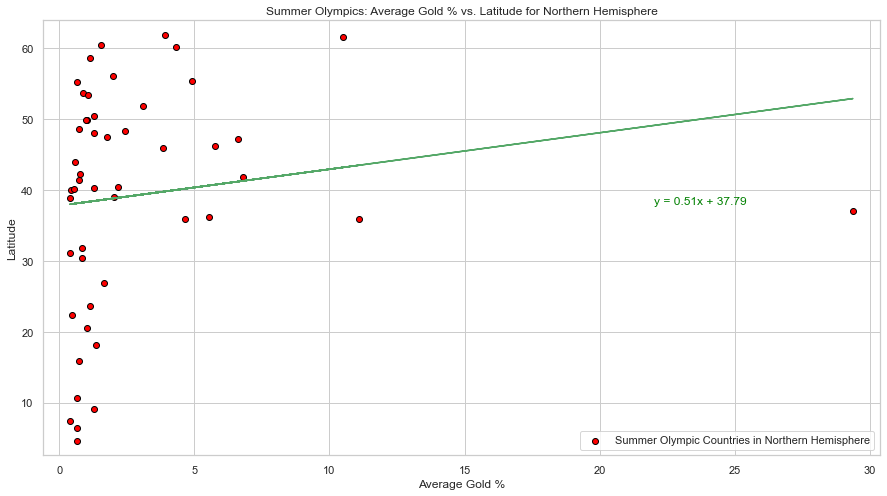

In [52]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("whitegrid")

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

#create equation line
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create scatter plot
plt.scatter(x_axis,y_axis, marker="o", facecolors="red", edgecolors="black", label = 'Summer Olympic Countries in Northern Hemisphere')

#add regression line
plt.plot(x_axis,regress_values,"g-")

#add regression equation
plt.annotate(line_eq, (22,38), fontsize=12, color="green")

#Scatter Plot formatting 
plt.title("Summer Olympics: Average Gold % vs. Latitude for Northern Hemisphere")
plt.xlabel("Average Gold %")
plt.ylabel("Latitude")
plt.legend(loc = 'lower right')



#Set limits
plt.ylim(y_axis.min() - 2, y_axis.max() + 2)  
plt.xlim(x_axis.min() -1, x_axis.max() +1)

print(f"The r-value is {rvalue}")

plt.savefig('output/summer_gold.png')
plt.show()

The r-value is 0.2671441466187599


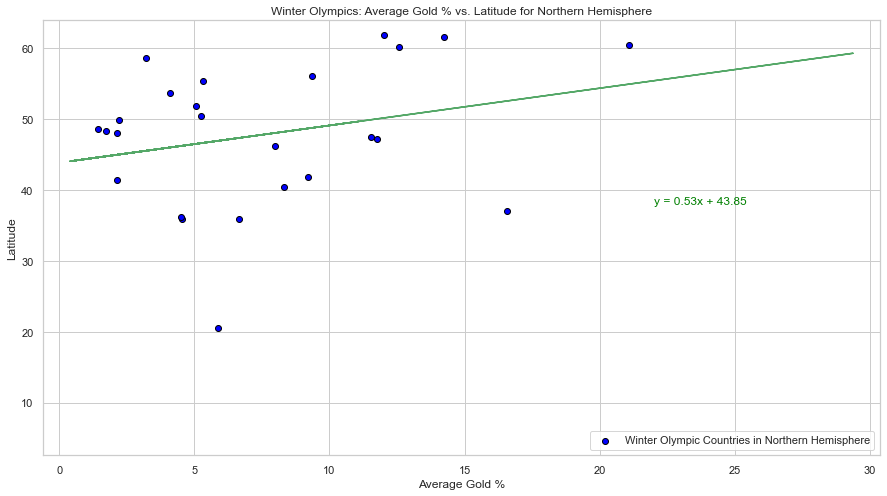

In [53]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("whitegrid")

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(wint_x, wint_y)

#create equation line
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create scatter plot
plt.scatter(wint_x,wint_y, marker="o", facecolors="blue", edgecolors="black", label = 'Winter Olympic Countries in Northern Hemisphere')

#add regression line
plt.plot(x_axis,regress_values,"g-")

#add regression equation
plt.annotate(line_eq, (22,38), fontsize=12, color="green")

#Scatter Plot formatting 
plt.title("Winter Olympics: Average Gold % vs. Latitude for Northern Hemisphere")
plt.xlabel("Average Gold %")
plt.ylabel("Latitude")
plt.legend(loc = 'lower right')



#Set limits
plt.ylim(y_axis.min() - 2, y_axis.max() + 2)  
plt.xlim(x_axis.min() -1, x_axis.max() +1)

print(f"The r-value is {rvalue}")


plt.savefig('output/winter_gold.png')
plt.show()